In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def check_duplicates_in_columns(df):
    """
    This function takes a DataFrame and checks for duplicate values in each column.
    It returns a summary DataFrame showing the number of duplicates for each column.
    
    Parameters:
    df (pd.DataFrame): The DataFrame to check for duplicates.
    
    Returns:
    pd.DataFrame: A DataFrame summarizing the number of duplicates for each column.
    """
    duplicate_summary = {}
    
    for col in df.columns:
        # Count duplicates in the column
        num_duplicates = df[col].dropna().duplicated(keep=False).sum()
        duplicate_summary[col] = num_duplicates
    
    # Convert the summary to a DataFrame for better readability
    duplicate_summary_df = pd.DataFrame(list(duplicate_summary.items()), columns=['Column', 'Num_Duplicates'])
    
    return duplicate_summary_df

def flag_outliers(df, columns):
    """
    Flags outliers in specified columns using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    columns (list): List of column names to check for outliers.
    
    Returns:
    pd.DataFrame: A DataFrame with a new column for each input column, 
                  indicating whether the value is an outlier (True/False).
    """
    outlier_flags = pd.DataFrame(index=df.index)  # To store the outlier flags
    
    for col in columns:
        # Filter out zero-length values
        non_zero_data = df[df[col] > 0][col]
        
        # Calculate Q1, Q3, and IQR
        Q1 = non_zero_data.quantile(0.25)
        Q3 = non_zero_data.quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Flag outliers
        df[f'{col}_outlier'] = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    return df


## EDA 

-  


In [3]:
# connect to db 
db_path = '../data/combined_data.db'
conn = sqlite3.connect(db_path)


In [4]:
merged_company_data = pd.read_sql_query('Select * from MergedCompanyData;', conn)
conn.close()


# keep a sample

merged_company_data.sample(50).to_excel('sample_data.xlsx', index=False)

In [5]:
print(merged_company_data.columns)
merged_company_data

Index(['id', 'CompanyName', 'Website', 'industry', 'current employee estimate',
       'total employee estimate', 'year founded', 'size range', 'country',
       'locality', 'linkedin url', 'Category', 'homepage_text', 'h1', 'h2',
       'h3', 'nav_link_text', 'meta_keywords', 'meta_description',
       'meta_description_is_english'],
      dtype='object')


id                CompanyName                 Website  \
0          1  bip dipietro electric inc         bipelectric.com   
1          2              elias medical        eliasmedical.com   
2          3       koops overhead doors  koopsoverheaddoors.com   
3          4            midtown eyecare         midtowneyes.com   
4          5         repro security ltd     reprosecurity.co.uk   
...      ...                        ...                     ...   
73443  73444            nayyarsons food          nayyarsons.com   
73444  73445            claddagh coffee  claddaghcoffeecafe.com   
73445  73446              beautyologist    beautyologist.com.au   
73446  73447                beauty call        beautycall.co.uk   
73447  73448          little lady foods     littleladyfoods.com   

                          industry  current employee estimate  \
0                     construction                          0   
1                 medical practice                          3   
2                     construction                          1   
3                 medical practice                          1   
4      security and investigations                          1   
...                            ...                        ...   
73443             food & beverages                          1   
73444             food & beverages                          1   
73445                    cosmetics                          2   
73446                    cosmetics                          9   
73447              food production                        100   

       total employee estimate  year founded size range         country  \
0                            1          1998     1 - 10   united states   
1                            3             0     1 - 10   united states   
2                            1             0     1 - 10   united states   
3                            1             0     1 - 10   united states   
4                            1             0     1 - 10  united kingdom   
...                        ...           ...        ...             ...   
73443                        3             0     1 - 10   united states   
73444                        6             0     1 - 10   united states   
73445                        3             0     1 - 10       australia   
73446                       14          2006    11 - 50  united kingdom   
73447                      294          1984   51 - 200   united states   

                                                locality  \
0                     vero beach, florida, united states   
1                 bakersfield, california, united states   
2                  averill park, new york, united states   
3                         tulsa, oklahoma, united states   
4      market harborough, leicestershire, united kingdom   
...                                                  ...   
73443             new hyde park, new york, united states   
73444           san francisco, california, united states   
73445                    vitoria, espirito santo, brazil   
73446             london, greater london, united kingdom   
73447         elk grove village, illinois, united states   

                                         linkedin url  \
0      linkedin.com/company/bip-dipietro-electric-inc   
1                  linkedin.com/company/elias-medical   
2           linkedin.com/company/koops-overhead-doors   
3                linkedin.com/company/midtown-eyecare   
4             linkedin.com/company/repro-security-ltd   
...                                               ...   
73443            linkedin.com/company/nayyarsons-food   
73444            linkedin.com/company/claddagh-coffee   
73445              linkedin.com/company/beautyologist   
73446                linkedin.com/company/beauty-call   
73447          linkedin.com/company/little-lady-foods   

                             Category  \
0      commercial services & supplies   
1                          healthca

In [6]:
# investigate dups
# for non-NA dups
print(check_duplicates_in_columns(merged_company_data))

                         Column  Num_Duplicates
0                            id               0
1                   CompanyName               0
2                       Website               0
3                      industry           73448
4     current employee estimate           72968
5       total employee estimate           72760
6                  year founded           73430
7                    size range           73448
8                       country           73448
9                      locality           66688
10                 linkedin url               0
11                     Category           73448
12                homepage_text            1331
13                           h1            3148
14                           h2            3230
15                           h3            3351
16                nav_link_text            2124
17                meta_keywords             810
18             meta_description            1635
19  meta_description_is_english         

In [7]:
# Display basic information about the dataset
print(merged_company_data.info())
print(merged_company_data.describe(include='all'))
# Count missing values for each column
missing_values = merged_company_data.isnull().sum()
print("Missing values per column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73448 entries, 0 to 73447
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           73448 non-null  int64  
 1   CompanyName                  73448 non-null  object 
 2   Website                      73448 non-null  object 
 3   industry                     73448 non-null  object 
 4   current employee estimate    73448 non-null  int64  
 5   total employee estimate      73448 non-null  int64  
 6   year founded                 73448 non-null  int64  
 7   size range                   73448 non-null  object 
 8   country                      73448 non-null  object 
 9   locality                     71724 non-null  object 
 10  linkedin url                 73448 non-null  object 
 11  Category                     73448 non-null  object 
 12  homepage_text                72137 non-null  object 
 13  h1              

In [8]:
text_columns = ['homepage_text', 'h1', 'h2', 'h3', 'nav_link_text', 'meta_keywords', 'meta_description']
# Assuming df is your DataFrame with length columns already calculated
text_length_columns = ['homepage_text_length', 'h1_length', 'h2_length', 'h3_length',
                       'nav_link_text_length', 'meta_keywords_length', 'meta_description_length']

# Create new columns with the length of the corresponding text columns
for col in text_columns:
    new_col_name = f'{col}_length'
    merged_company_data[new_col_name] = merged_company_data[col].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)


# Summary statistics for text length columns
print(merged_company_data[text_length_columns].describe())
merged_company_data

       homepage_text_length     h1_length     h2_length     h3_length  \
count          73448.000000  73448.000000  73448.000000  73448.000000   
mean             591.775065      6.679120     17.065189     15.813528   
std              939.152988     23.018659     36.107820     44.483430   
min                0.000000      0.000000      0.000000      0.000000   
25%              227.000000      0.000000      0.000000      0.000000   
50%              416.000000      3.000000      8.000000      5.000000   
75%              712.000000      8.000000     21.000000     18.000000   
max            79435.000000   4491.000000   2278.000000   4905.000000   

       nav_link_text_length  meta_keywords_length  meta_description_length  
count          73448.000000          73448.000000              73448.00000  
mean              16.271362             14.288531                 25.40189  
std              107.386064            820.493224                 52.36656  
min                0.000000       

id                CompanyName                 Website  \
0          1  bip dipietro electric inc         bipelectric.com   
1          2              elias medical        eliasmedical.com   
2          3       koops overhead doors  koopsoverheaddoors.com   
3          4            midtown eyecare         midtowneyes.com   
4          5         repro security ltd     reprosecurity.co.uk   
...      ...                        ...                     ...   
73443  73444            nayyarsons food          nayyarsons.com   
73444  73445            claddagh coffee  claddaghcoffeecafe.com   
73445  73446              beautyologist    beautyologist.com.au   
73446  73447                beauty call        beautycall.co.uk   
73447  73448          little lady foods     littleladyfoods.com   

                          industry  current employee estimate  \
0                     construction                          0   
1                 medical practice                          3   
2                     construction                          1   
3                 medical practice                          1   
4      security and investigations                          1   
...                            ...                        ...   
73443             food & beverages                          1   
73444             food & beverages                          1   
73445                    cosmetics                          2   
73446                    cosmetics                          9   
73447              food production                        100   

       total employee estimate  year founded size range         country  \
0                            1          1998     1 - 10   united states   
1                            3             0     1 - 10   united states   
2                            1             0     1 - 10   united states   
3                            1             0     1 - 10   united states   
4                            1             0     1 - 10  united kingdom   
...                        ...           ...        ...             ...   
73443                        3             0     1 - 10   united states   
73444                        6             0     1 - 10   united states   
73445                        3             0     1 - 10       australia   
73446                       14          2006    11 - 50  united kingdom   
73447                      294          1984   51 - 200   united states   

                                                locality  ...  \
0                     vero beach, florida, united states  ...   
1                 bakersfield, california, united states  ...   
2                  averill park, new york, united states  ...   
3                         tulsa, oklahoma, united states  ...   
4      market harborough, leicestershire, united kingdom  ...   
...                                                  ...  ...   
73443             new hyde park, new york, united states  ...   
73444           san francisco, california, united states  ...   
73445                    vitoria, espirito santo, brazil  ...   
73446             london, greater london, united kingdom  ...   
73447         elk grove village, illinois, united states  ...   

                                           meta_keywords  \
0      electricians vero beach, vero beach electrical...   
1      Elias Medical bakersfield ca family doctor med...   
2      Koops Overhead Doors, Albany Garage Doors, Tro...   
3                                                   None   
4                                                   None   
...                                                  ...   
73443            Nayyarsons, Deli, Bakery, Food Services   
73444  Claddagh Coffee Cafe, Saint Paul, St. Paul, Mi...   
73445                                               None   
73446                                               None   
73447                                               None   

                     

In [9]:
# Create the `total_webpage` column by concatenating all text columns with the `[SEP]` token
# Set the column to `NaN` if all text columns are `NaN`
def concatenate_text(row):
    if row.isna().all():
        return np.nan
    else:
        return ' [SEP] '.join(row.dropna())

merged_company_data['total_webpage'] = merged_company_data[text_columns].apply(concatenate_text, axis=1)

# Calculate the total length of all text columns per row
merged_company_data['total_webpage_length'] = merged_company_data[text_length_columns].sum(axis=1)
merged_company_data['total_webpage_length'].describe()


# append new columns
text_length_columns.append('total_webpage_length')
text_columns.append('total_webpage')
text_length_columns

['homepage_text_length',
 'h1_length',
 'h2_length',
 'h3_length',
 'nav_link_text_length',
 'meta_keywords_length',
 'meta_description_length',
 'total_webpage_length']

In [10]:
# flag outliers based on text column len 
merged_company_data = flag_outliers(merged_company_data, text_length_columns)
merged_company_data

id                CompanyName                 Website  \
0          1  bip dipietro electric inc         bipelectric.com   
1          2              elias medical        eliasmedical.com   
2          3       koops overhead doors  koopsoverheaddoors.com   
3          4            midtown eyecare         midtowneyes.com   
4          5         repro security ltd     reprosecurity.co.uk   
...      ...                        ...                     ...   
73443  73444            nayyarsons food          nayyarsons.com   
73444  73445            claddagh coffee  claddaghcoffeecafe.com   
73445  73446              beautyologist    beautyologist.com.au   
73446  73447                beauty call        beautycall.co.uk   
73447  73448          little lady foods     littleladyfoods.com   

                          industry  current employee estimate  \
0                     construction                          0   
1                 medical practice                          3   
2                     construction                          1   
3                 medical practice                          1   
4      security and investigations                          1   
...                            ...                        ...   
73443             food & beverages                          1   
73444             food & beverages                          1   
73445                    cosmetics                          2   
73446                    cosmetics                          9   
73447              food production                        100   

       total employee estimate  year founded size range         country  \
0                            1          1998     1 - 10   united states   
1                            3             0     1 - 10   united states   
2                            1             0     1 - 10   united states   
3                            1             0     1 - 10   united states   
4                            1             0     1 - 10  united kingdom   
...                        ...           ...        ...             ...   
73443                        3             0     1 - 10   united states   
73444                        6             0     1 - 10   united states   
73445                        3             0     1 - 10       australia   
73446                       14          2006    11 - 50  united kingdom   
73447                      294          1984   51 - 200   united states   

                                                locality  ...  \
0                     vero beach, florida, united states  ...   
1                 bakersfield, california, united states  ...   
2                  averill park, new york, united states  ...   
3                         tulsa, oklahoma, united states  ...   
4      market harborough, leicestershire, united kingdom  ...   
...                                                  ...  ...   
73443             new hyde park, new york, united states  ...   
73444           san francisco, california, united states  ...   
73445                    vitoria, espirito santo, brazil  ...   
73446             london, greater london, united kingdom  ...   
73447         elk grove village, illinois, united states  ...   

                                           total_webpage total_webpage_length  \
0      Electricians and electrical contractors servin...                  324   
1      site map en español Elias Medical home about u...                  506   
2      Home About Us Garage Door Repair Service Desig...                  944   
3       Type Size: A A A Home Our Practice Our Servic...                  236   
4      Simply fill out our form below and we will be ...                  391   
...                                                  ...                  ...   
73443  Nayyarsons, Deli, Bakery, Food Services [SEP] ...                   11   
73444  Home About Us Our Shops West Seventh Wee Shop ...                   80   
73445   Make 

In [11]:
merged_company_data.columns

Index(['id', 'CompanyName', 'Website', 'industry', 'current employee estimate',
       'total employee estimate', 'year founded', 'size range', 'country',
       'locality', 'linkedin url', 'Category', 'homepage_text', 'h1', 'h2',
       'h3', 'nav_link_text', 'meta_keywords', 'meta_description',
       'meta_description_is_english', 'homepage_text_length', 'h1_length',
       'h2_length', 'h3_length', 'nav_link_text_length',
       'meta_keywords_length', 'meta_description_length', 'total_webpage',
       'total_webpage_length', 'homepage_text_length_outlier',
       'h1_length_outlier', 'h2_length_outlier', 'h3_length_outlier',
       'nav_link_text_length_outlier', 'meta_keywords_length_outlier',
       'meta_description_length_outlier', 'total_webpage_length_outlier'],
      dtype='object')

In [12]:
# Initialize a dictionary to store the counts
summary_dict = {
    'Column': [],
    'Missing Values': [],
    'Outliers': []
}

# Calculate missing values and outliers for each text column
for column in text_columns:
    missing_count = merged_company_data[column].isna().sum()
    outlier_count = merged_company_data[f'{column}_length_outlier'].sum()
    
    summary_dict['Column'].append(column)
    summary_dict['Missing Values'].append(missing_count)
    summary_dict['Outliers'].append(outlier_count)

# Convert the dictionary into a DataFrame
summary_df = pd.DataFrame(summary_dict)

# Print the summary DataFrame
print("Summary of Missing Values and Outliers:")
print(summary_df)

# Count rows where all text columns have missing values
all_text_columns_missing = merged_company_data[text_columns].isna().all(axis=1).sum()

# Print the count of rows where all text values are missing
print(f"\nCount of rows where all text values are missing: {all_text_columns_missing}")

Summary of Missing Values and Outliers:
             Column  Missing Values  Outliers
0     homepage_text            1311      4489
1                h1           27187      4600
2                h2           20791      3656
3                h3           29265      3438
4     nav_link_text           25789      3820
5     meta_keywords           49914      1887
6  meta_description            7058     13276
7     total_webpage             571      4368

Count of rows where all text values are missing: 571


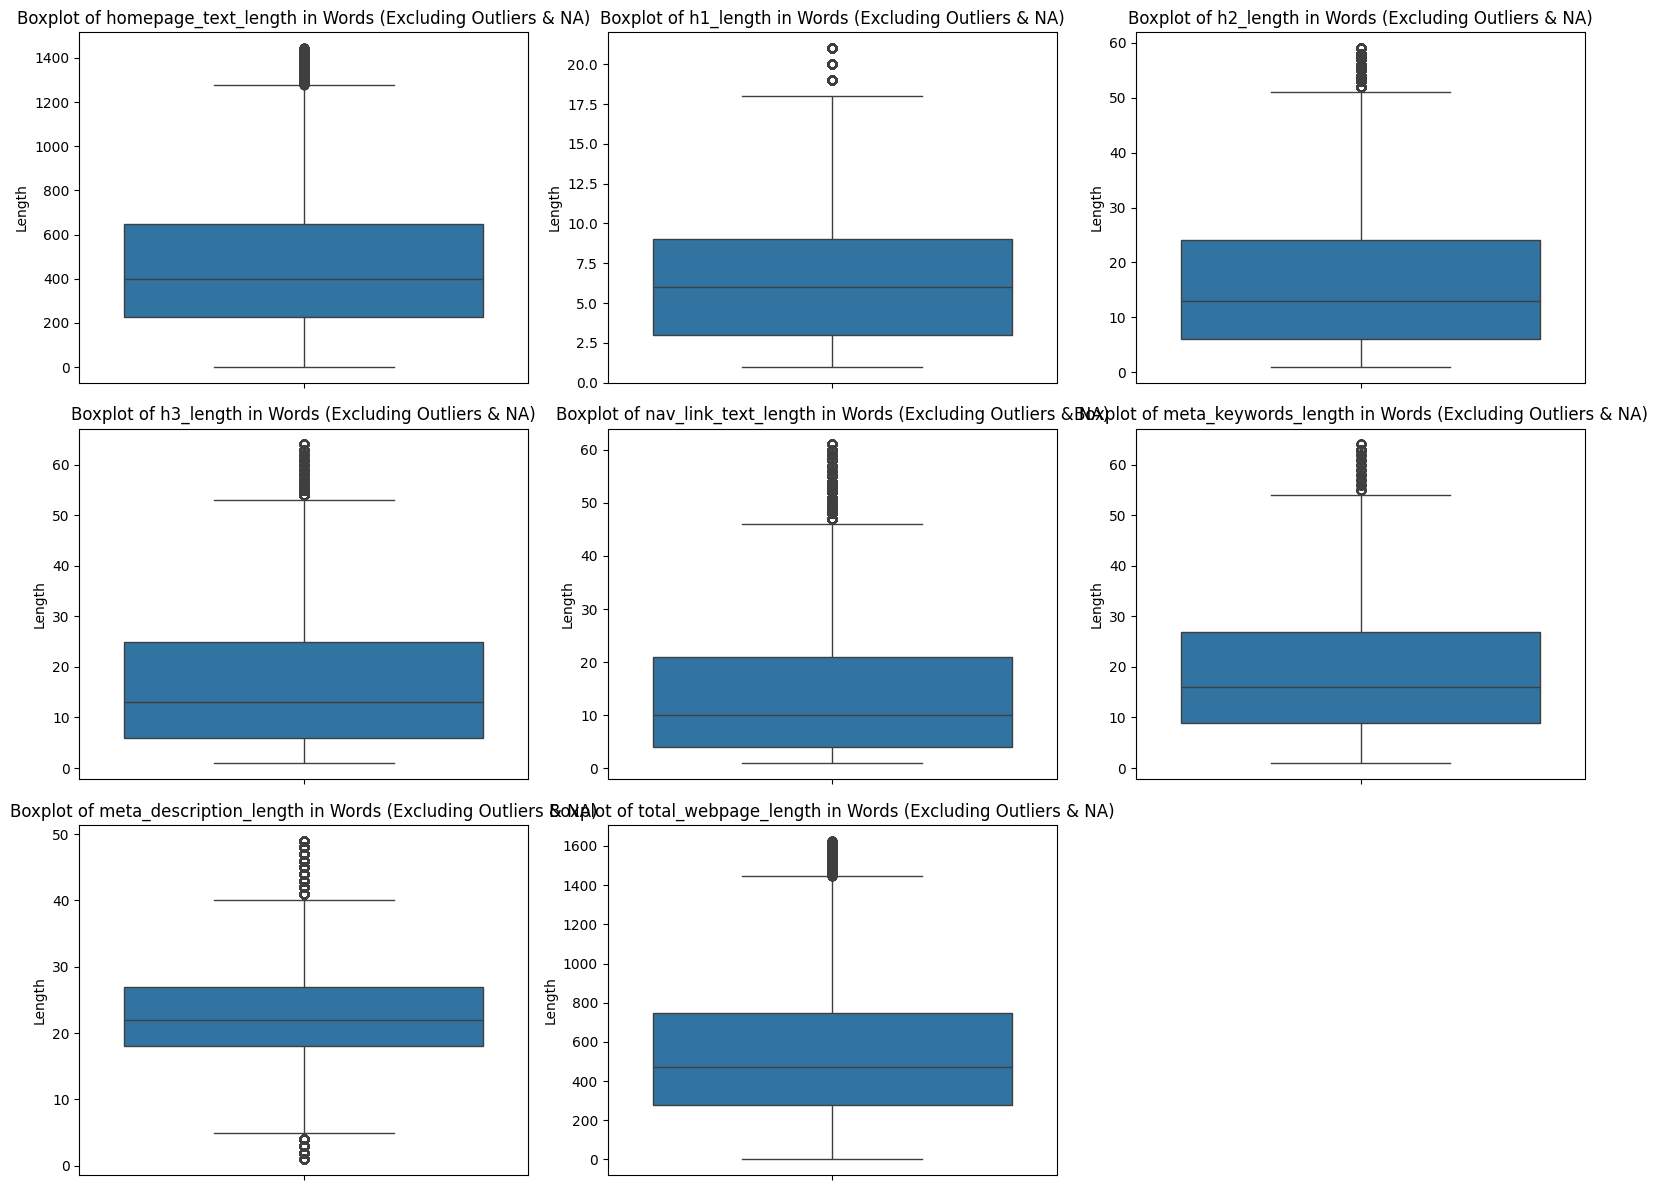

In [13]:
plt.figure(figsize=(16, 12))

for i, col in enumerate(text_length_columns, 1):
    plt.subplot(3, 3, i)
    
    # Exclude outliers and zero-length values
    non_outlier_non_zero_data = merged_company_data[
        (merged_company_data[f'{col}_outlier'] == False) & (merged_company_data[col] > 0)
    ][col]
    # Plot boxplot for non-outlier lengths only
    sns.boxplot(data=non_outlier_non_zero_data)
    
    plt.title(f'Boxplot of {col} in Words (No Outliers & NA)')
    plt.ylabel('Length')

plt.tight_layout()
plt.show()


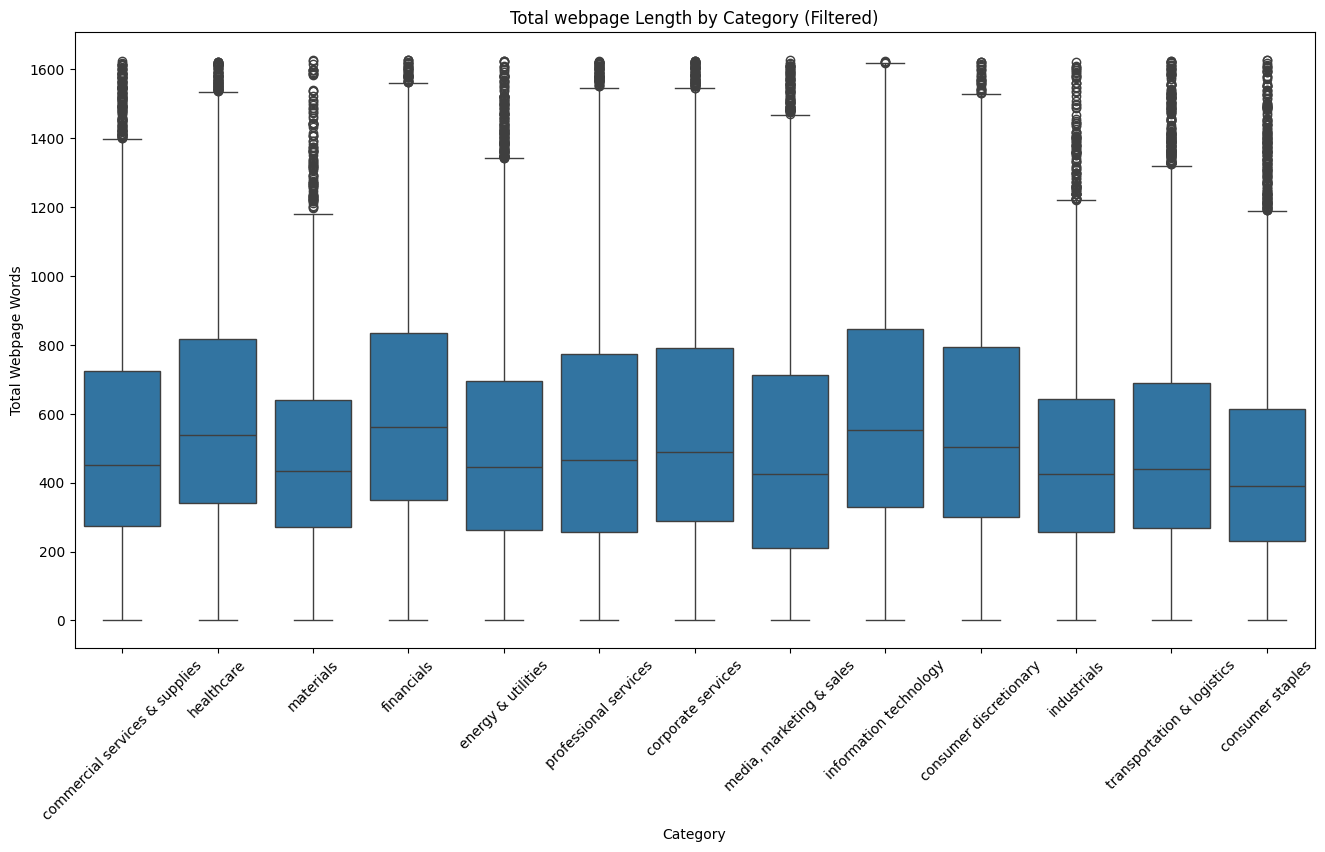

                                 count        mean         std  min    25%  \
Category                                                                     
commercial services & supplies  6052.0  532.306180  342.872060  2.0  275.0   
consumer discretionary          2707.0  572.393055  358.648063  1.0  301.5   
consumer staples                5076.0  463.718282  318.263558  1.0  232.0   
corporate services              6448.0  569.929280  366.672114  1.0  289.0   
energy & utilities              5383.0  511.576630  334.768045  1.0  262.0   
financials                      6244.0  615.733184  350.341489  2.0  349.0   
healthcare                      6617.0  607.157322  353.850188  1.0  340.0   
industrials                     3239.0  488.659772  313.241830  1.0  258.0   
information technology          5719.0  612.065571  371.189126  1.0  330.0   
materials                       2541.0  492.841795  306.434683  1.0  272.0   
media, marketing & sales        5828.0  503.472889  366.665439  

In [14]:
# Filter out 0 values and outliers in the 'total_webpage_words' column
filtered_data = merged_company_data[
    (merged_company_data['total_webpage_length_outlier'] == False) &
    (merged_company_data['total_webpage_length'] > 0)
]

# Visualize the correlation between total text length and Category using boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(x='Category', y='total_webpage_length', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Total webpage Length by Category (Filtered)')
plt.xlabel('Category')
plt.ylabel('Total Webpage Words')
plt.show()

# Optionally, calculate summary statistics to see the correlation
correlation_stats = filtered_data.groupby('Category')['total_webpage_length'].describe()
print(correlation_stats)

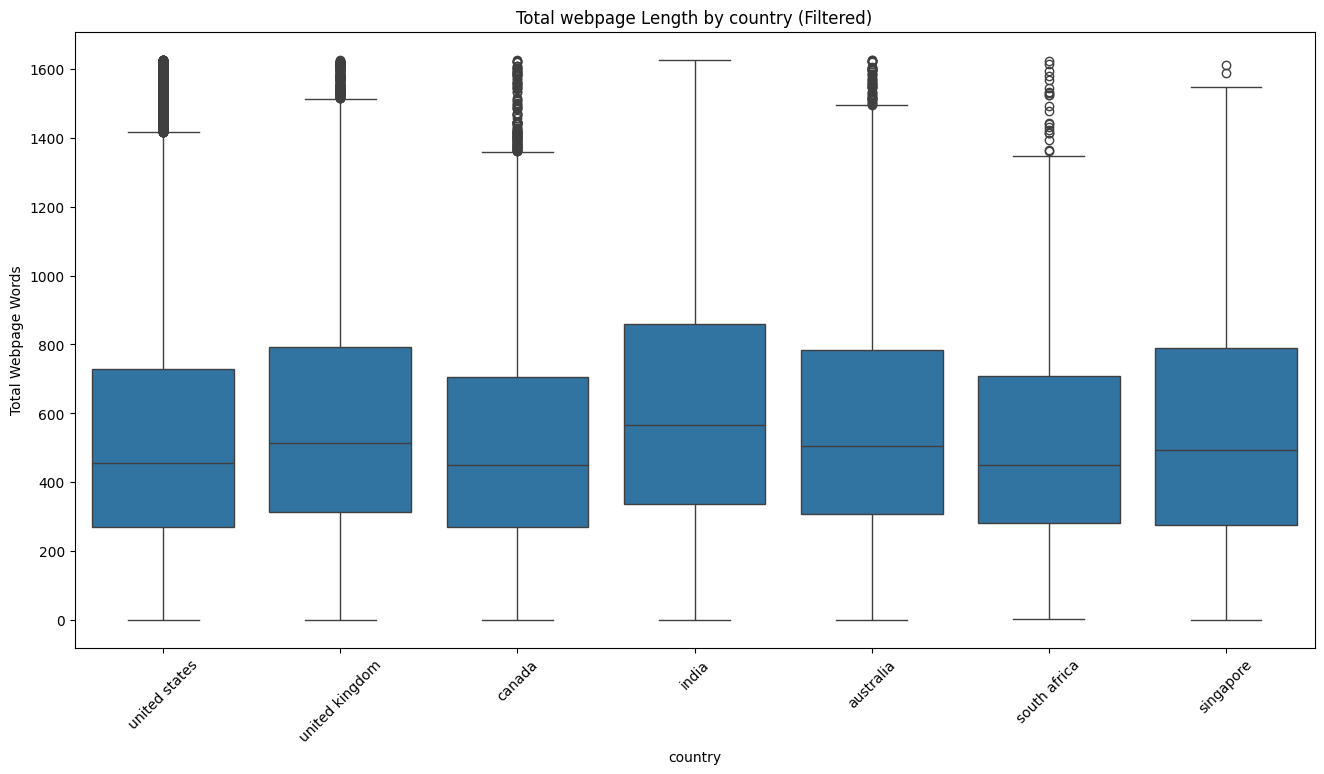

                  count        mean         std  min    25%    50%    75%  \
country                                                                     
australia        3344.0  576.489234  355.789869  1.0  308.0  505.0  783.0   
canada           4806.0  522.439451  341.439252  1.0  270.0  450.0  706.0   
india            3191.0  624.035412  377.576284  1.0  338.0  567.0  859.0   
singapore         331.0  557.335347  362.039156  1.0  277.0  494.0  790.0   
south africa      607.0  523.611203  339.817958  4.0  283.0  451.0  709.5   
united kingdom  10729.0  580.709013  354.698802  1.0  314.0  515.0  794.0   
united states   45501.0  532.984264  350.299994  1.0  269.0  457.0  728.0   

                   max  
country                 
australia       1625.0  
canada          1627.0  
india           1627.0  
singapore       1611.0  
south africa    1622.0  
united kingdom  1626.0  
united states   1627.0  


In [15]:
# Filter out 0 values and outliers in the 'total_webpage_words' column
filtered_data = merged_company_data[
    (merged_company_data['total_webpage_length_outlier'] == False) &
    (merged_company_data['total_webpage_length'] > 0)
]

# Visualize the correlation between total text length and Category using boxplot
plt.figure(figsize=(16, 8))
sns.boxplot(x='country', y='total_webpage_length', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Total webpage Length by country (Filtered)')
plt.xlabel('country')
plt.ylabel('Total Webpage Words')
plt.show()

# Optionally, calculate summary statistics to see the correlation
correlation_stats = filtered_data.groupby('country')['total_webpage_length'].describe()
print(correlation_stats)

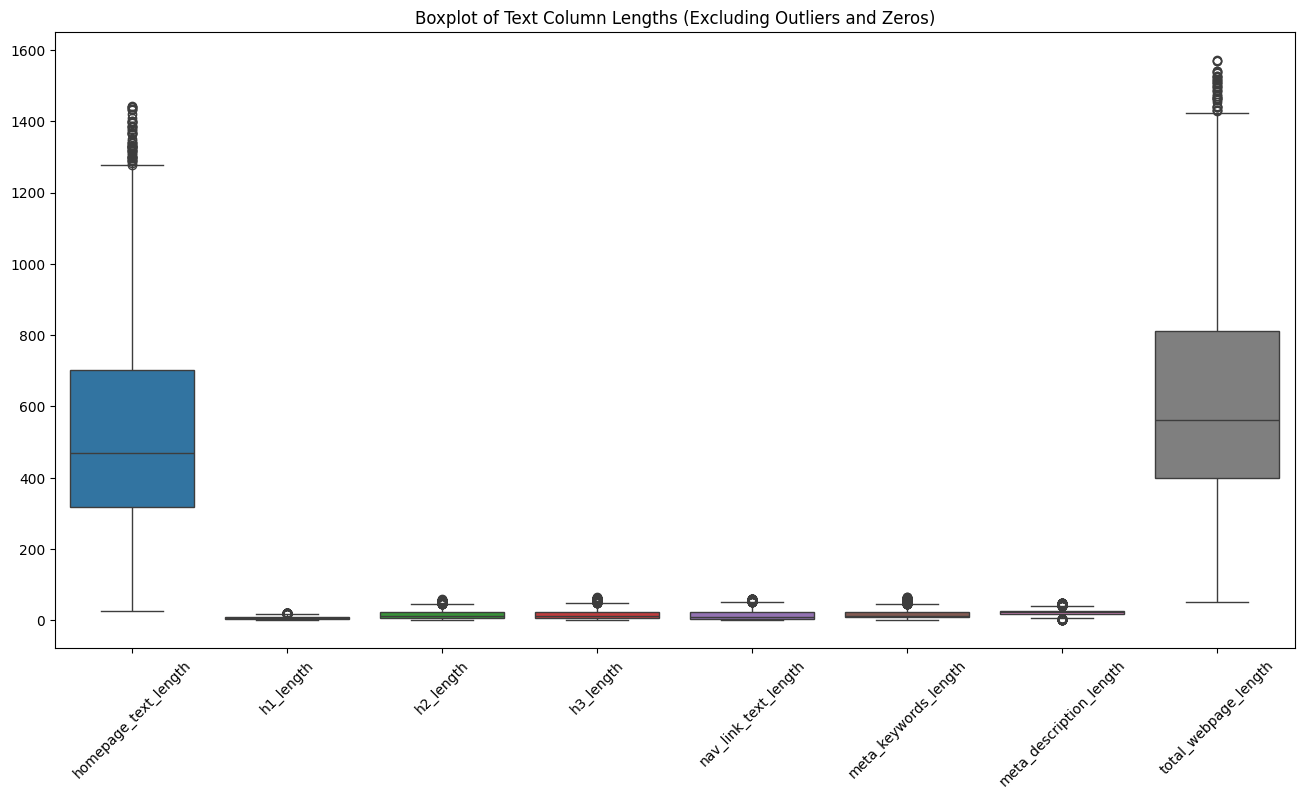

In [16]:
# Filter out outliers and zero values for each column
filtered_data = merged_company_data.copy()
for col in text_length_columns:
    filtered_data = filtered_data[
        (filtered_data[f'{col}_outlier'] == False) & (filtered_data[col] > 0)
    ]

# Plot boxplots for each text length column, excluding outliers and zeros
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_data[text_length_columns])
plt.xticks(rotation=45)
plt.title('Boxplot of Text Column Lengths (Excluding Outliers and Zeros)')
plt.show()

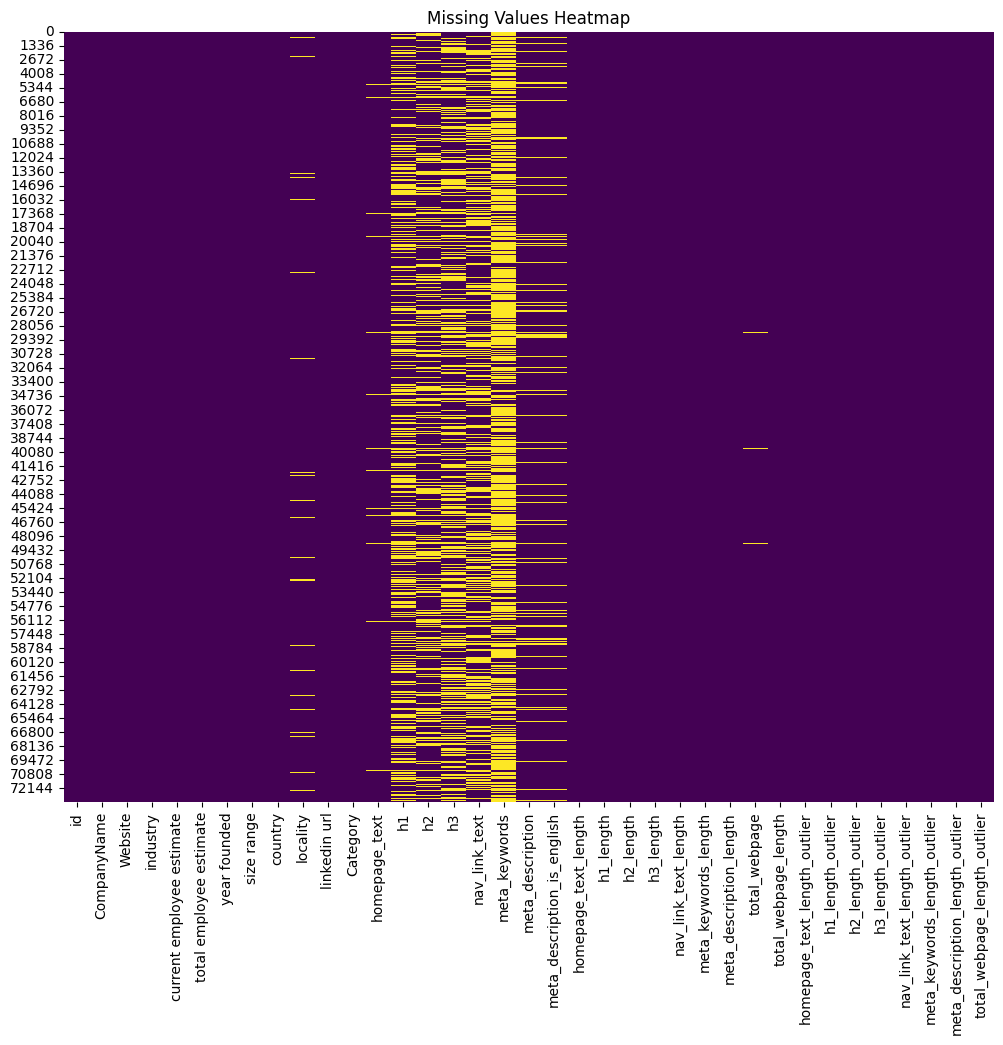

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(merged_company_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [18]:
# numerical_columns = ['current employee estimate', 'total employee estimate', 'year founded']

# for col in numerical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(merged_company_data[col].dropna(), kde=False, bins=3)
#     plt.title(f'Distribution of {col}')
#     plt.show()

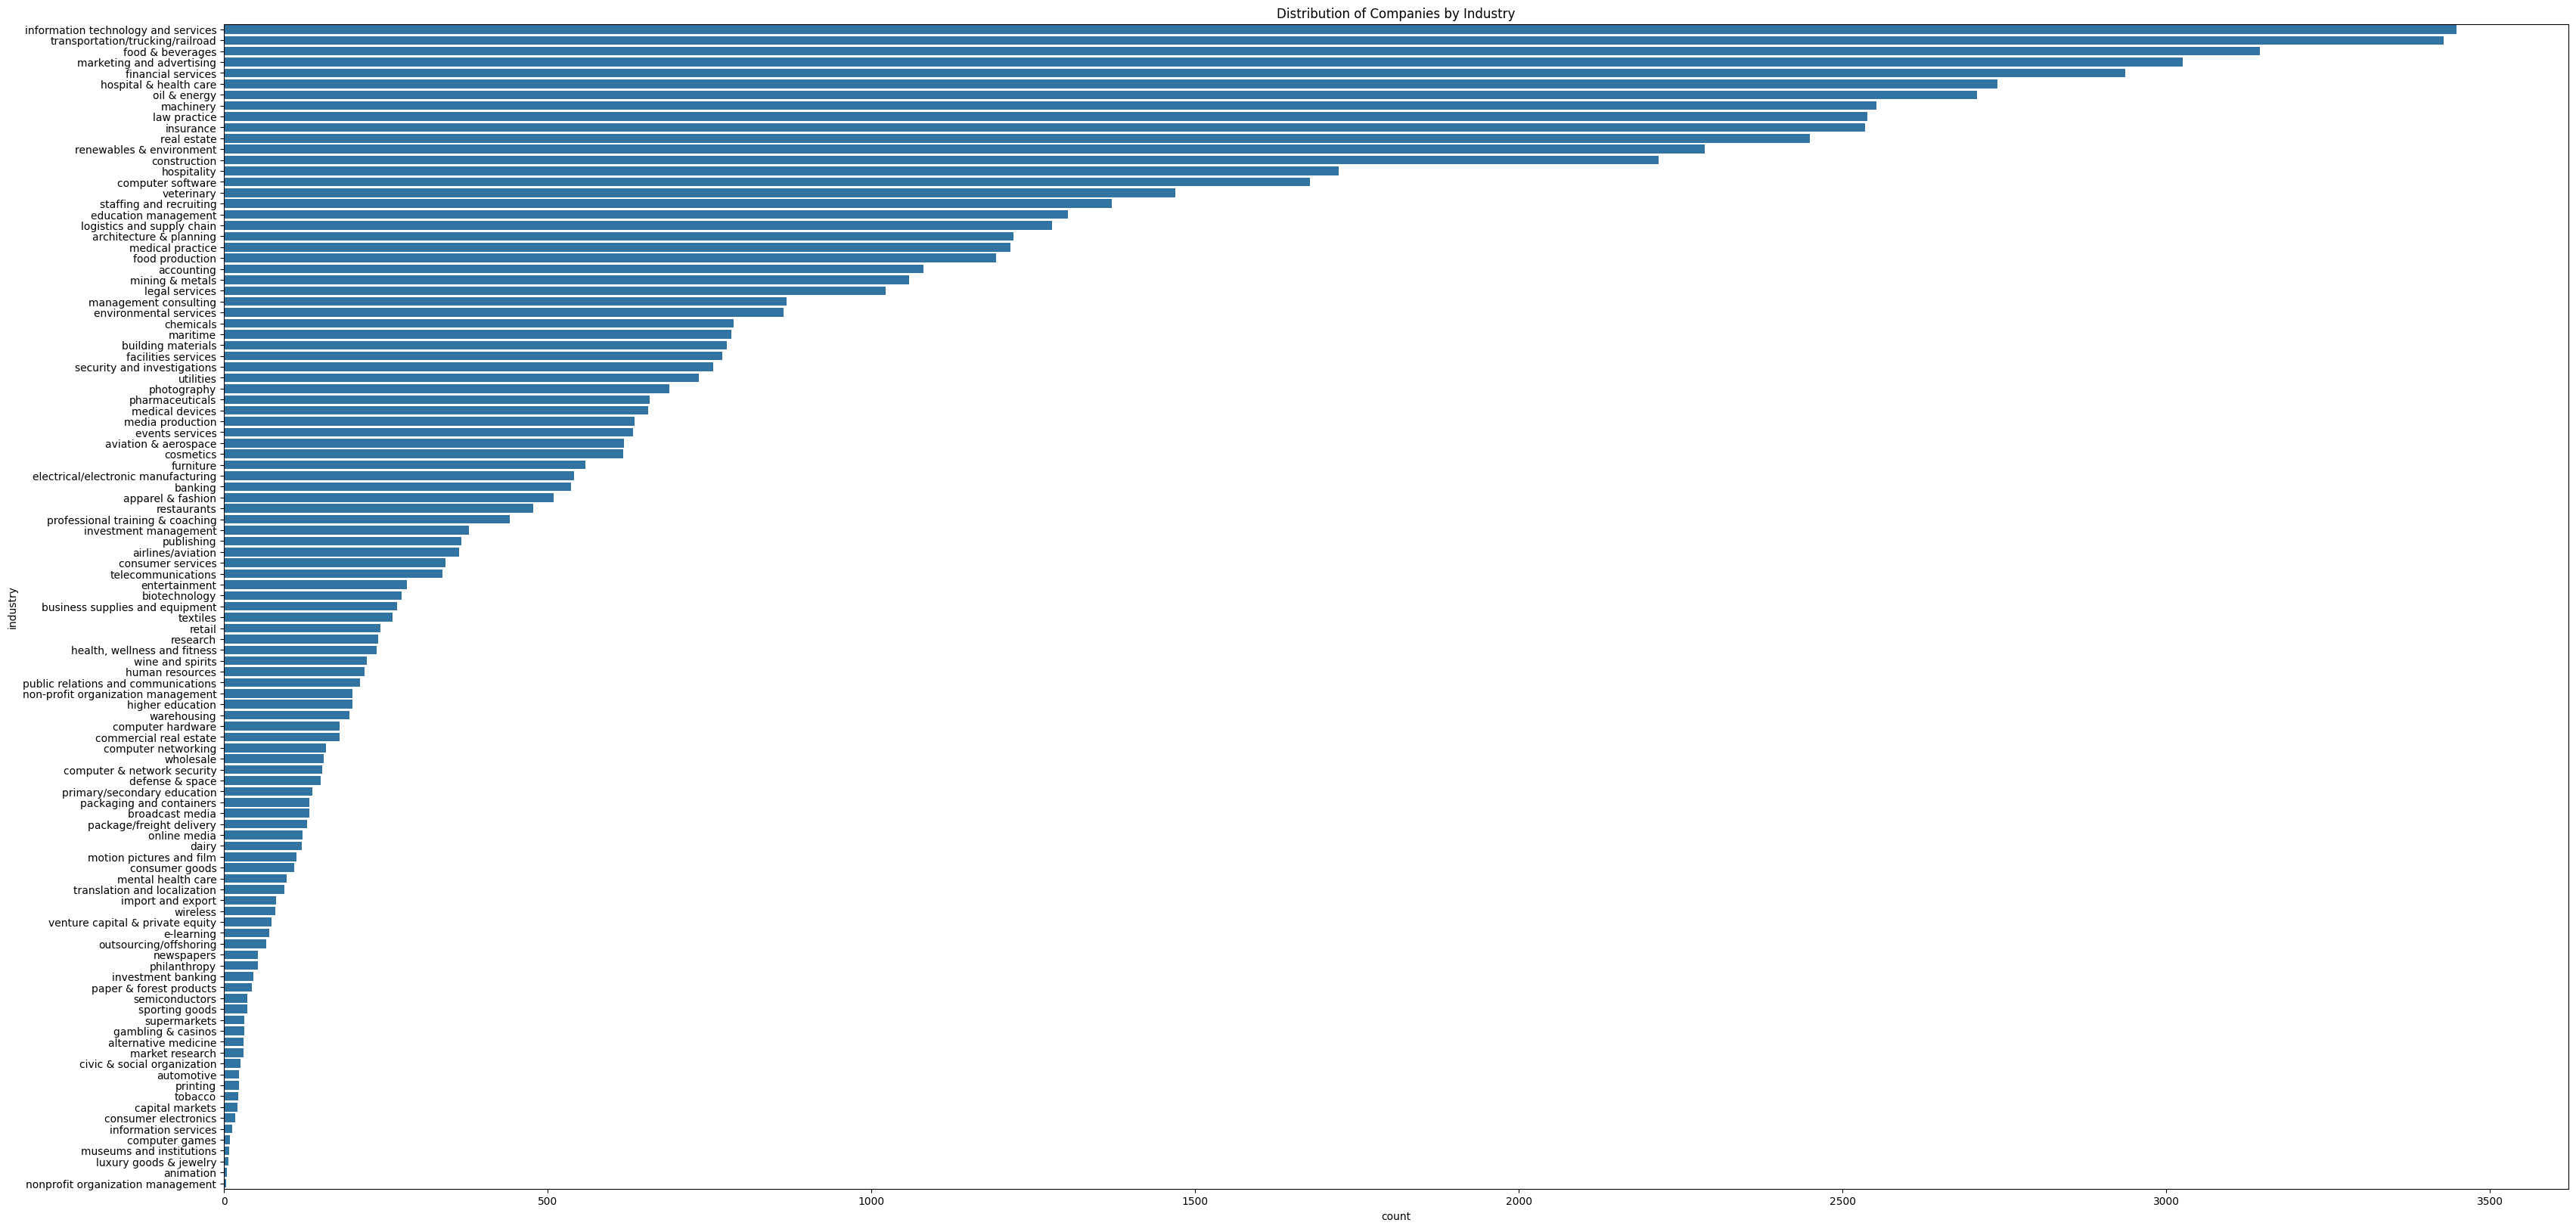

In [19]:
plt.figure(figsize=(40, 20))
sns.countplot(y='industry', data=merged_company_data, order=merged_company_data['industry'].value_counts().index)
plt.title('Distribution of Companies by Industry')
plt.show()


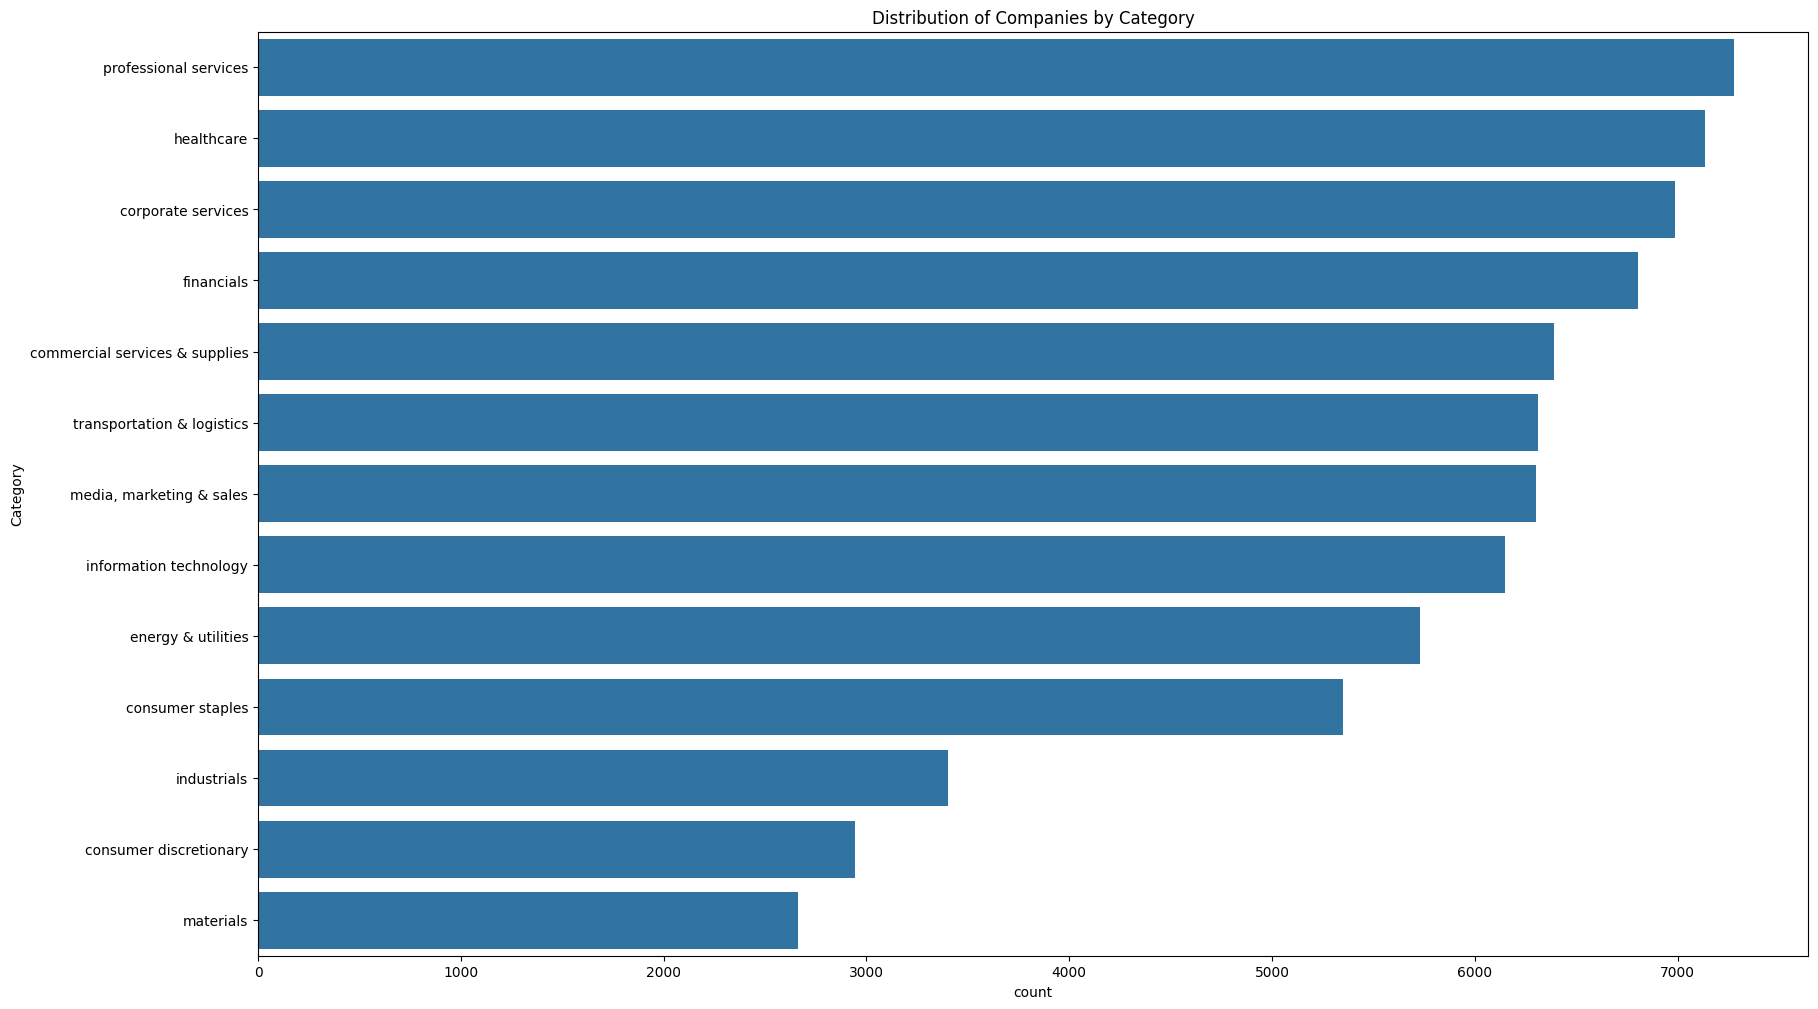

In [20]:
plt.figure(figsize=(20, 12))
sns.countplot(y='Category', data=merged_company_data, order=merged_company_data['Category'].value_counts().index)
plt.title('Distribution of Companies by Category')
plt.show()

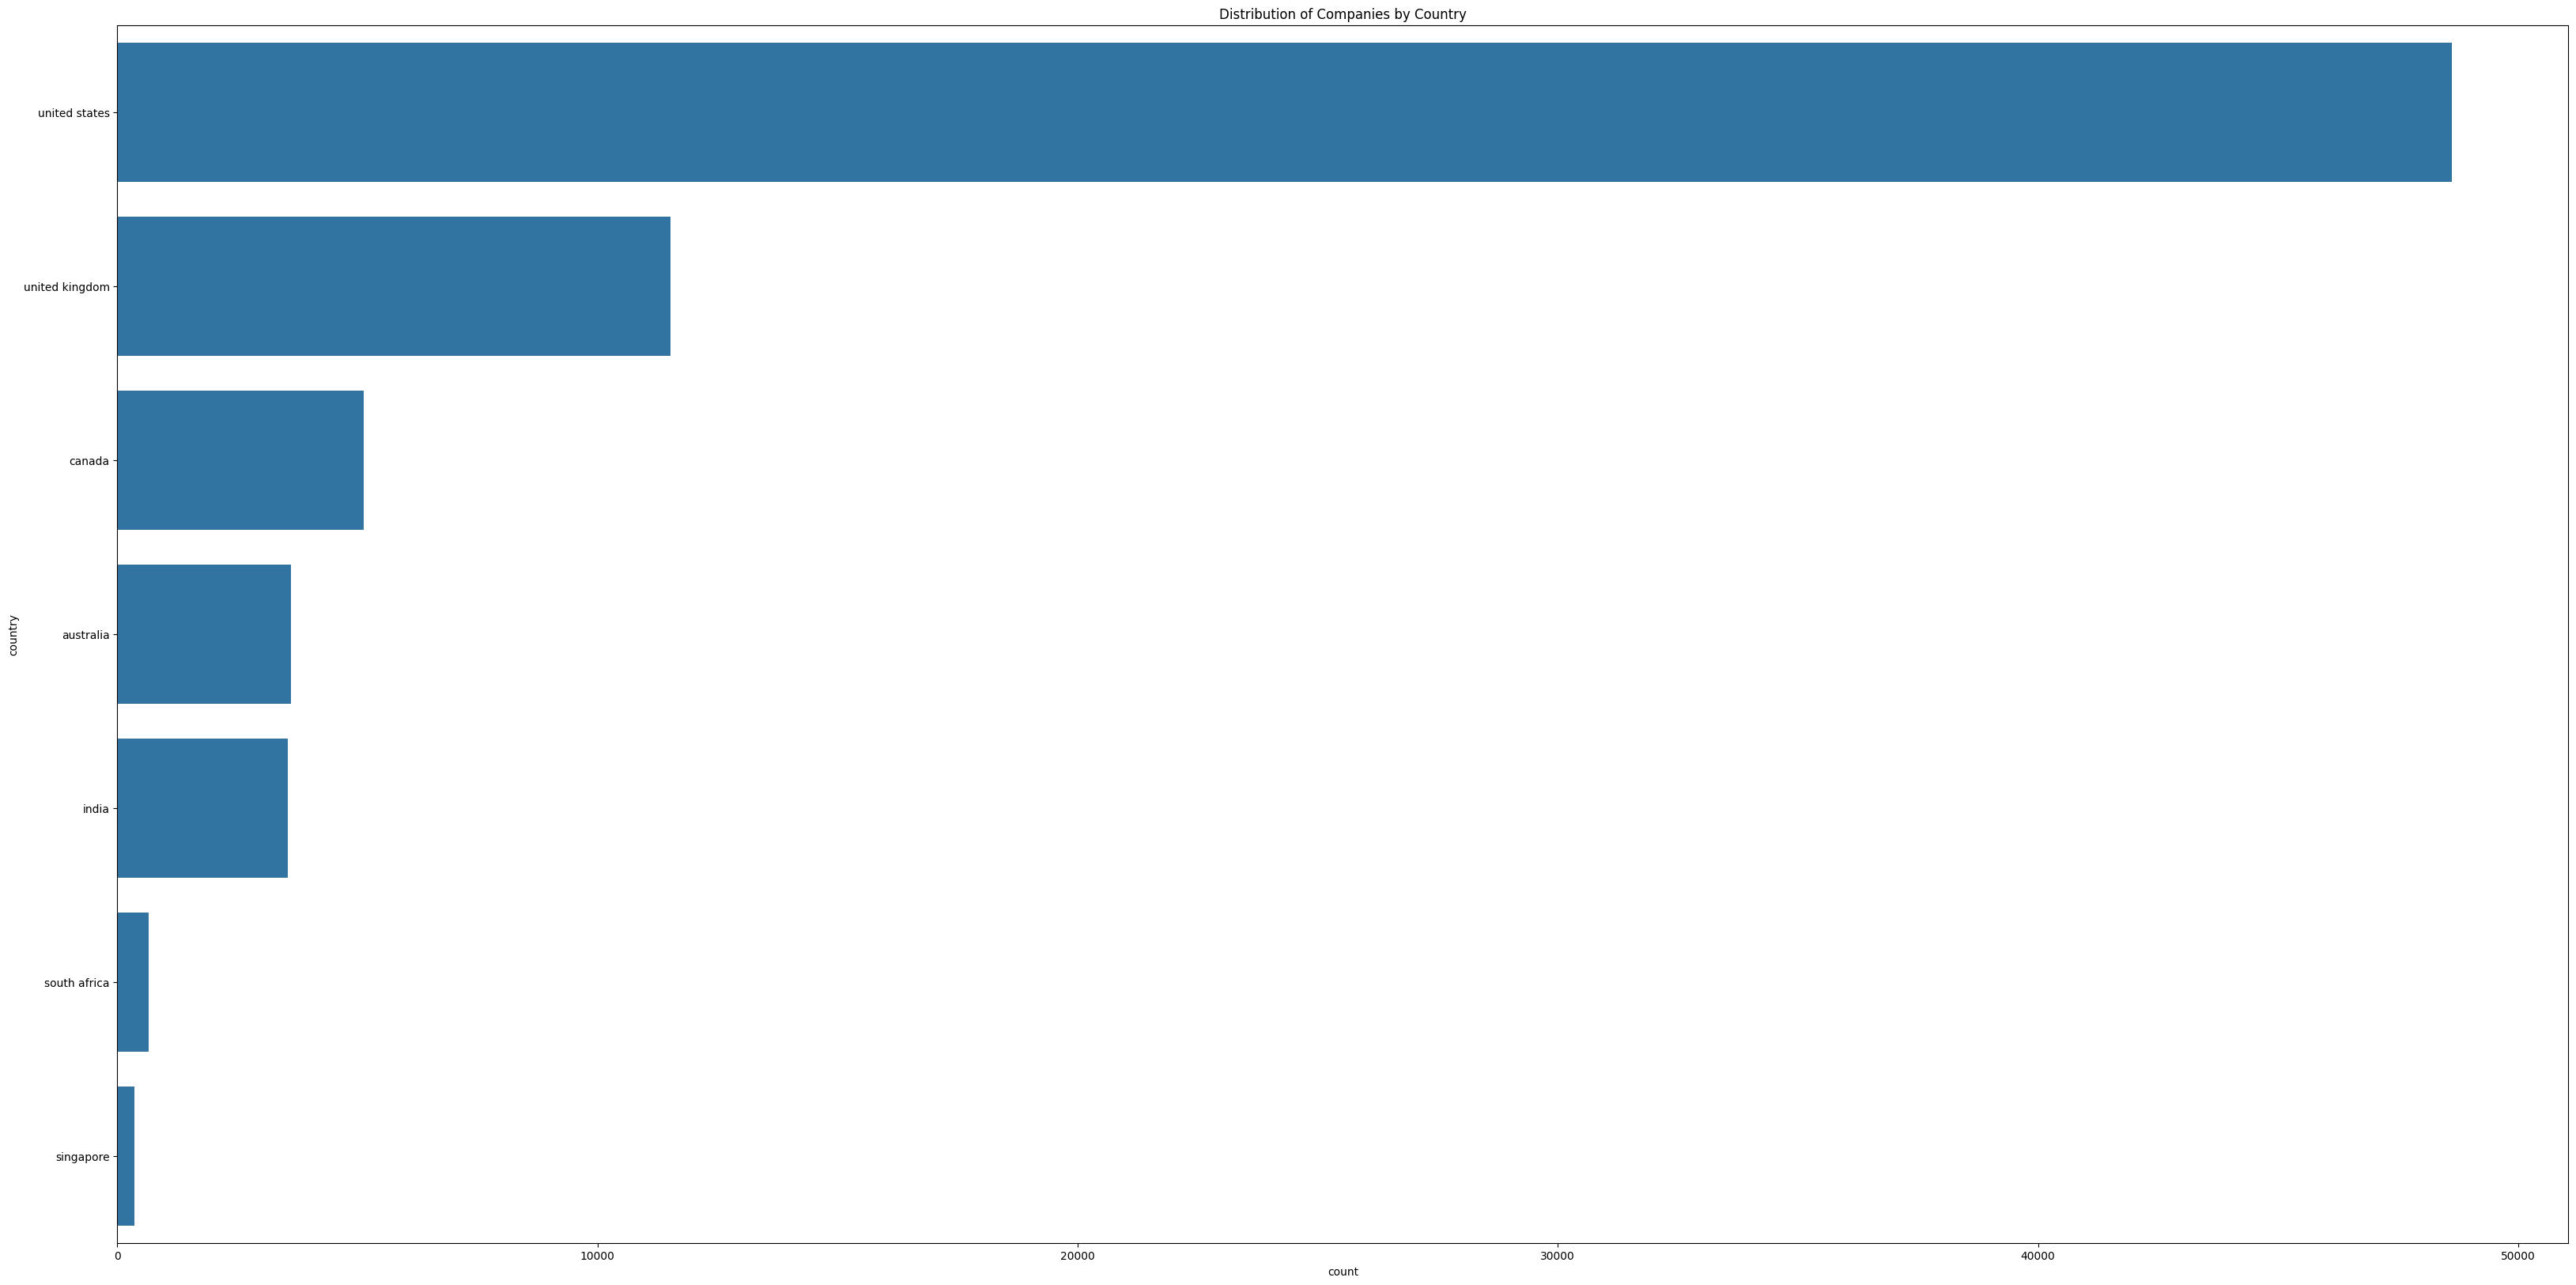

In [21]:
plt.figure(figsize=(40, 20))
sns.countplot(y='country', data=merged_company_data, order=merged_company_data['country'].value_counts().index)
plt.title('Distribution of Companies by Country')
plt.show()

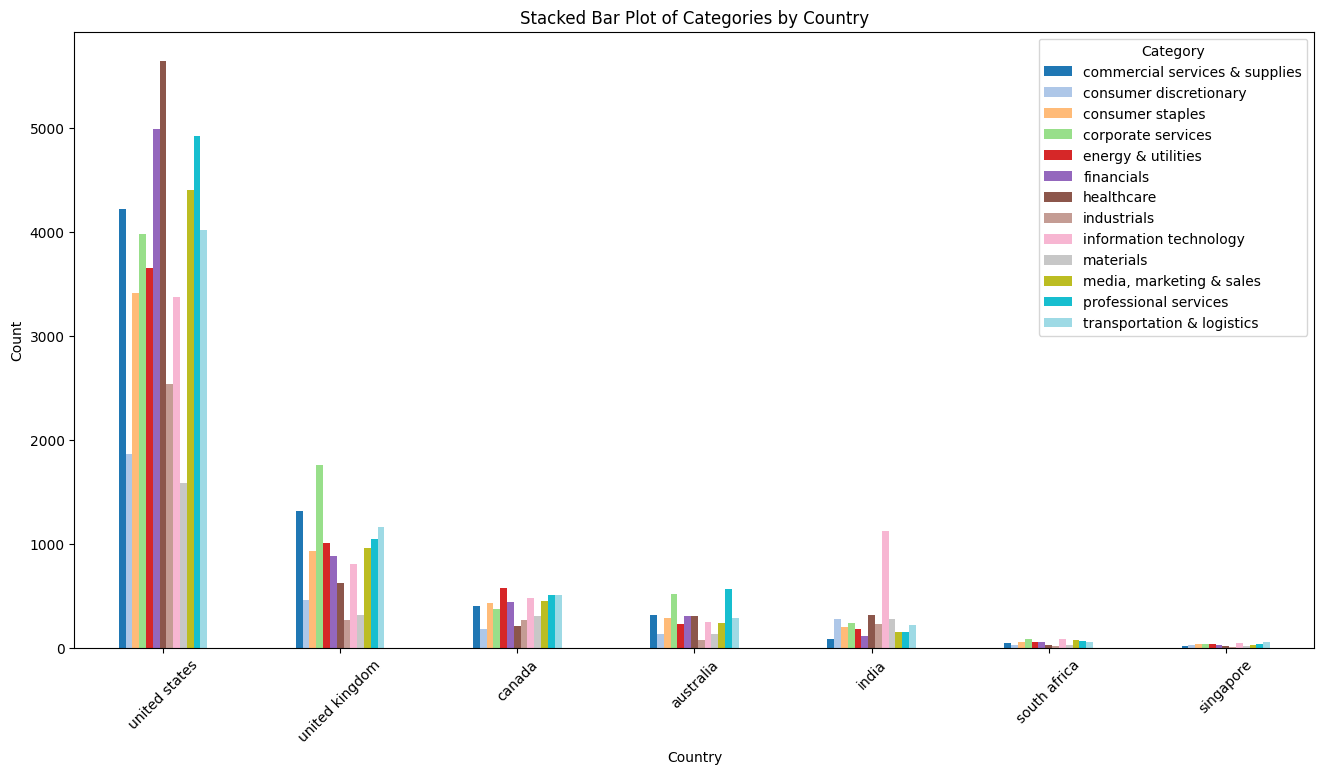

In [22]:
# Create a count of occurrences for each country-category combination
country_category_counts = merged_company_data.groupby(['country', 'Category']).size().unstack().fillna(0)

# Calculate the total counts for each country
country_totals = country_category_counts.sum(axis=1)

# Sort the countries by total counts
country_category_counts = country_category_counts.loc[country_totals.sort_values(ascending=False).index]

# Plot the stacked bar plot
country_category_counts.plot(kind='bar', stacked=False, figsize=(16, 8), colormap='tab20')

plt.title('Stacked Bar Plot of Categories by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()


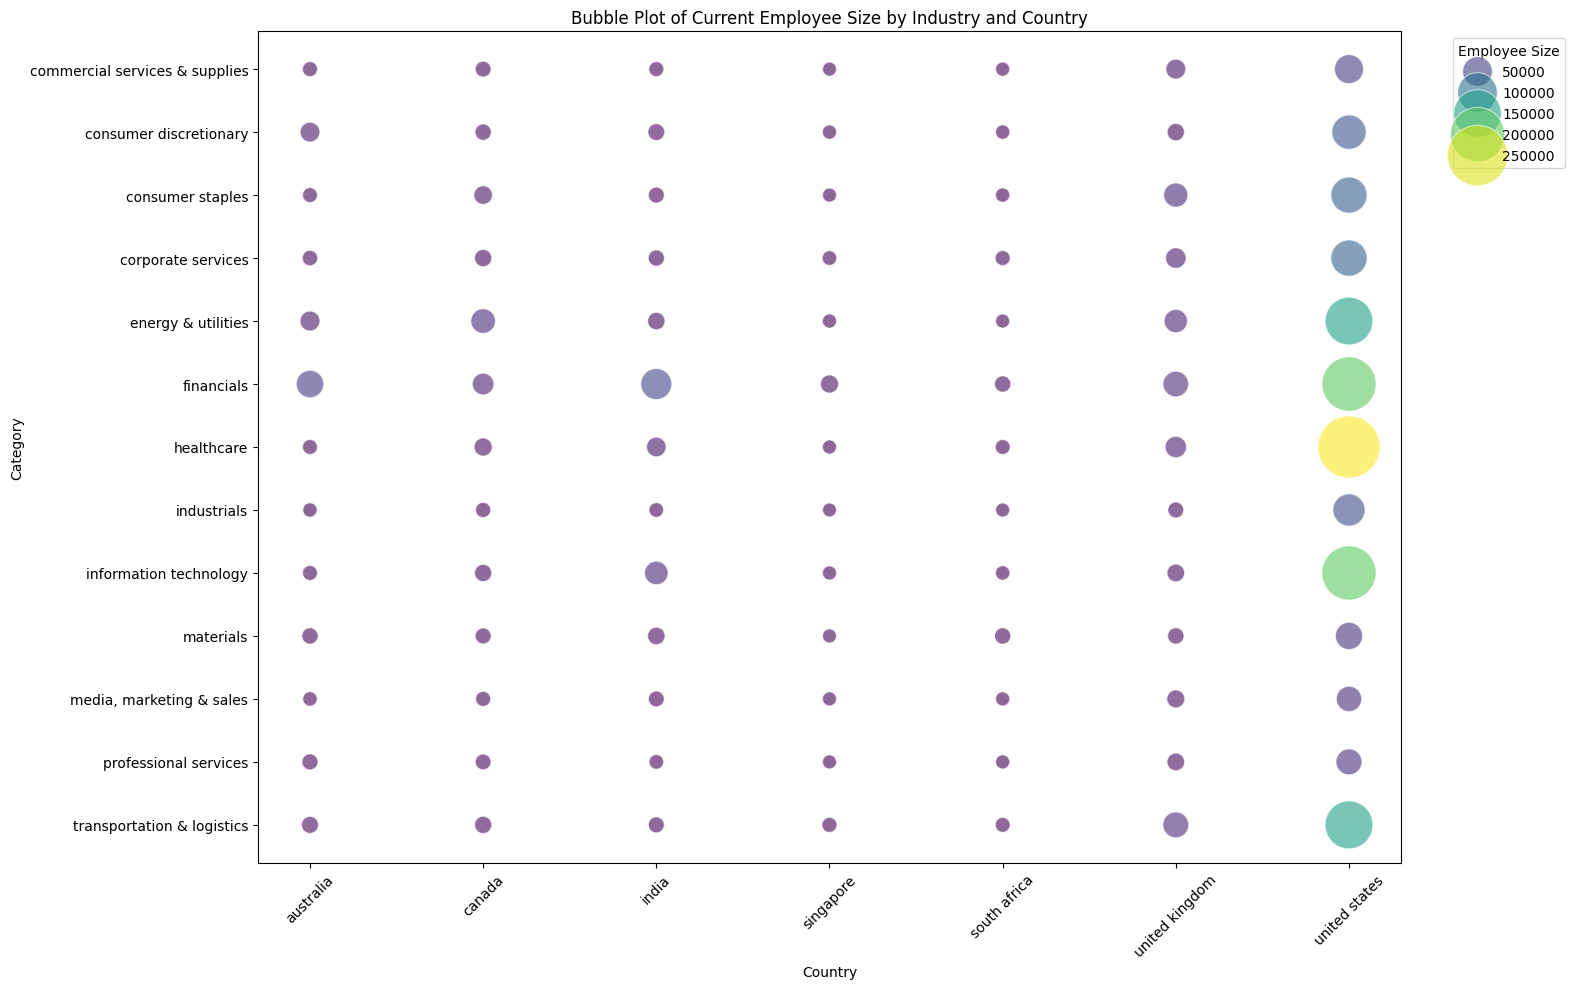

In [23]:

# Group by country and industry and sum the current employee estimate
bubble_data = merged_company_data.groupby(['country', 'Category'])['current employee estimate'].sum().reset_index()

# Plot the bubble plot
plt.figure(figsize=(16, 10))
sns.scatterplot(
    data=bubble_data,
    x='country',
    y='Category',
    size='current employee estimate',
    sizes=(100, 2000),  # Adjust the range for bubble sizes
    hue='current employee estimate',  # Color by employee size (optional)
    palette='viridis',  # You can choose a different color palette
    alpha=0.6,
    edgecolor='w'
)

plt.title('Bubble Plot of Current Employee Size by Industry and Country')
plt.xlabel('Country')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Employee Size', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

In [24]:
merged_company_data.columns

Index(['id', 'CompanyName', 'Website', 'industry', 'current employee estimate',
       'total employee estimate', 'year founded', 'size range', 'country',
       'locality', 'linkedin url', 'Category', 'homepage_text', 'h1', 'h2',
       'h3', 'nav_link_text', 'meta_keywords', 'meta_description',
       'meta_description_is_english', 'homepage_text_length', 'h1_length',
       'h2_length', 'h3_length', 'nav_link_text_length',
       'meta_keywords_length', 'meta_description_length', 'total_webpage',
       'total_webpage_length', 'homepage_text_length_outlier',
       'h1_length_outlier', 'h2_length_outlier', 'h3_length_outlier',
       'nav_link_text_length_outlier', 'meta_keywords_length_outlier',
       'meta_description_length_outlier', 'total_webpage_length_outlier'],
      dtype='object')

### Text  deep dive


#### 1. Word Clouds

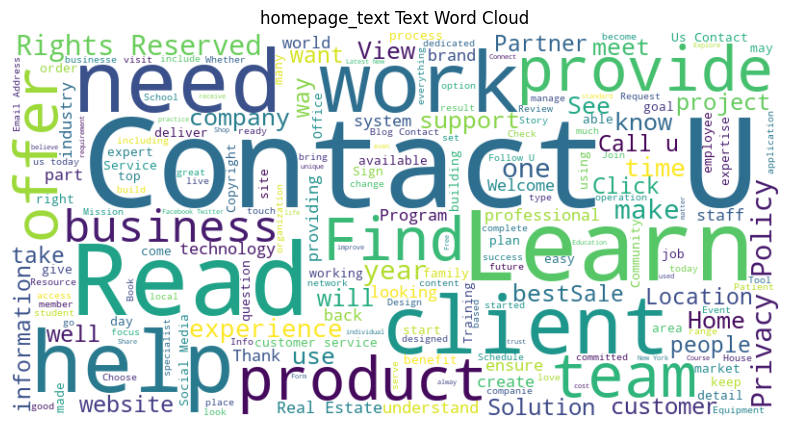

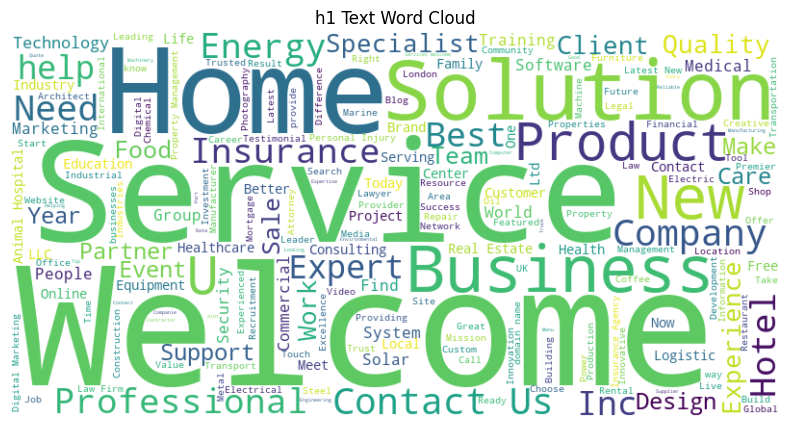

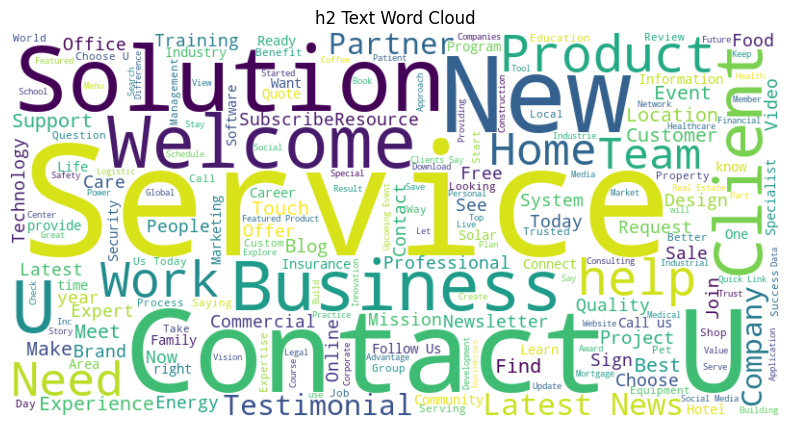

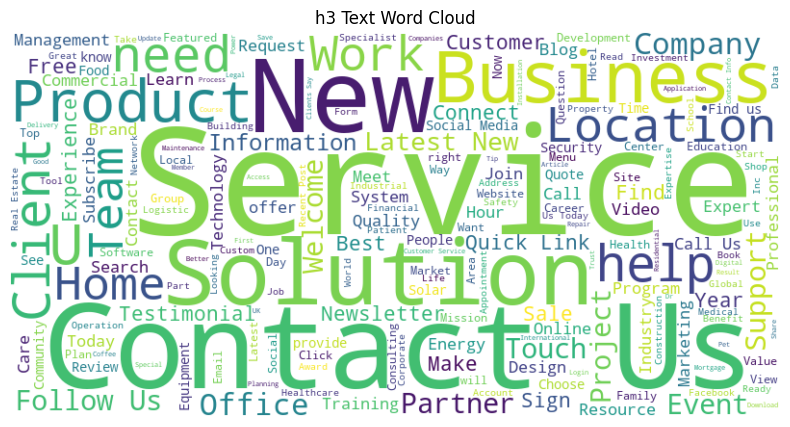

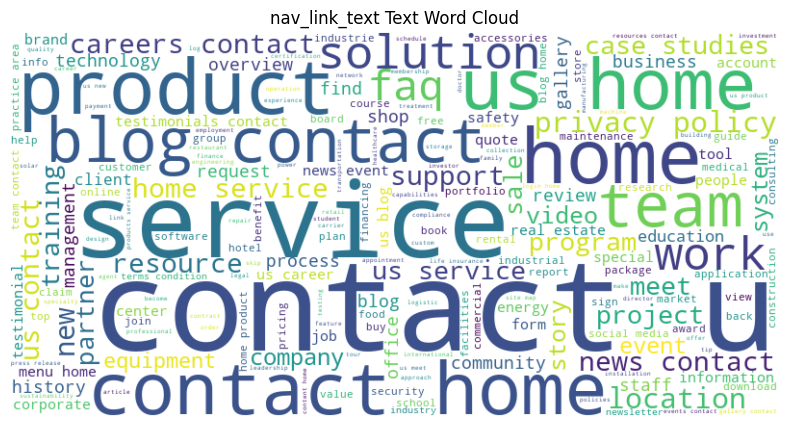

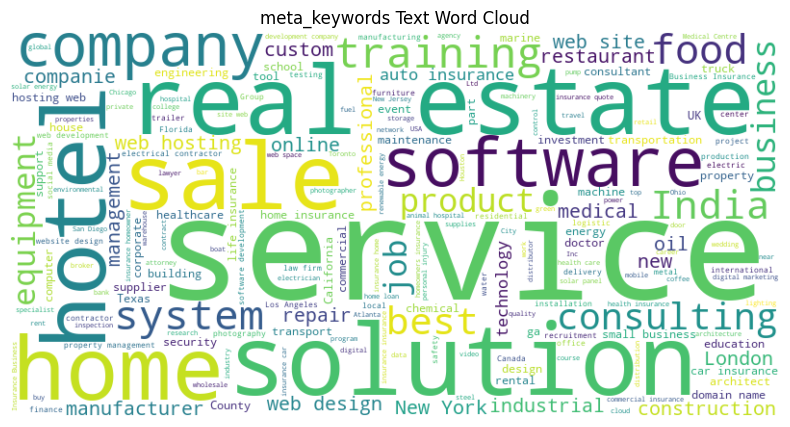

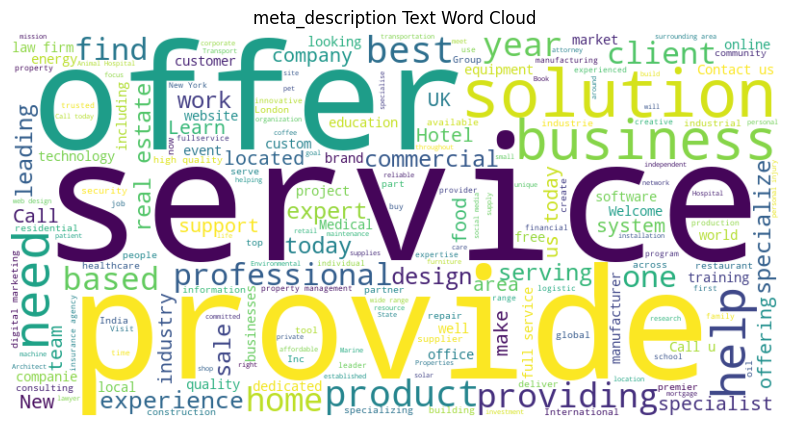

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text_data, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data.dropna()))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

for column in text_columns:
    if column != 'total_webpage':
        # Example for a single text column
        generate_wordcloud(merged_company_data[merged_company_data[f'{column}_length_outlier']  == False][column], title=f'{column} Text Word Cloud')


#### 2. Term Frequency-Inverse Document Frequency (TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_top_terms(text_data, top_n=10):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(text_data.dropna())
    feature_names = vectorizer.get_feature_names_out()
    avg_tfidf = tfidf_matrix.mean(axis=0).A1
    top_indices = avg_tfidf.argsort()[-top_n:]
    return [(feature_names[i], avg_tfidf[i]) for i in top_indices]

for column in text_columns:
    # Example for a single text column
    top_terms = tfidf_top_terms(text_data=merged_company_data[merged_company_data[f'{column}_length_outlier']  == False][column])
    print(f"Top TF-IDF Terms for {column} Text:", top_terms)


Top TF-IDF Terms for homepage_text Text: [('products', 0.012317949548937777), ('read', 0.012318104863006761), ('learn', 0.012551708061666148), ('solutions', 0.0140720849670999), ('service', 0.014526636751588572), ('home', 0.016613892628349294), ('business', 0.017702375226076535), ('insurance', 0.01850363874133546), ('contact', 0.01937004144613331), ('services', 0.026253101068697816)]
Top TF-IDF Terms for h1 Text: [('management', 0.005625785465866935), ('service', 0.006051054007873647), ('energy', 0.0062396528697528375), ('company', 0.006365546984440883), ('business', 0.007413093117103738), ('insurance', 0.008203781998315113), ('solutions', 0.01044540064487496), ('services', 0.012986936821441591), ('home', 0.02130826621664791), ('welcome', 0.024898380196439703)]
Top TF-IDF Terms for h2 Text: [('latest', 0.0056315822607175235), ('help', 0.006014820288554647), ('clients', 0.0060574802615171956), ('solutions', 0.006063682415833111), ('insurance', 0.006109372759403625), ('business', 0.00655

#### 3. Topic Modeling (Latent Dirichlet Allocation - LDA)
Topic modeling discovers abstract topics that occur in a collection of documents. LDA is a popular algorithm for this purpose.

In [ ]:
# import gensim
# from gensim import corpora

# def topic_modeling(text_data, num_topics=5, num_words=10):
#     processed_text = [text.split() for text in text_data.dropna()]
#     dictionary = corpora.Dictionary(processed_text)
#     doc_term_matrix = [dictionary.doc2bow(doc) for doc in processed_text]
#     Lda = gensim.models.ldamodel.LdaModel
#     lda_model = Lda(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=50)
#     topics = lda_model.print_topics(num_words=num_words)
#     return topics
    
# for column in text_columns:
#     # Example for a single text column
#     topics = topic_modeling(text_data=merged_company_data[merged_company_data[f'{column}_length_outlier']  == False][column])
#     for idx, topic in enumerate(topics):
#         print(f"Topic {idx+1}: {topic}")


#### 4. Named Entity Recognition (NER)
NER extracts and classifies named entities (e.g., persons, organizations, locations) in the text.

In [ ]:
# import spacy

# def named_entity_recognition(text_data):
#     nlp = spacy.load('en_core_web_sm')
#     entities = []
#     for doc in nlp.pipe(text_data.dropna()):
#         entities.extend([(ent.text, ent.label_) for ent in doc.ents])
#     return entities

# for column in text_columns:
# # Example for a single text column
#     entities = named_entity_recognition(text_data=merged_company_data[merged_company_data[f'{column}_length_outlier']  == False][column])
#     print(f"Named Entities in {column} Text:", entities[:10])


In [ ]:
text_columns

['homepage_text',
 'h1',
 'h2',
 'h3',
 'nav_link_text',
 'meta_keywords',
 'meta_description',
 'total_webpage']

#### 5. Text Summarization
Text summarization generates concise summaries of large text data.

In [ ]:
# from transformers import pipeline
# import pandas as pd

# # Initialize the summarization pipeline
# summarizer = pipeline("summarization")

# def summarize_text_transformers(text, max_length=50, min_length=25):
#     """
#     Summarizes the given text using the Hugging Face transformers library.

#     Parameters:
#     - text (str): The text to be summarized.
#     - max_length (int): Maximum length of the summary.
#     - min_length (int): Minimum length of the summary.

#     Returns:
#     - str: The summarized text.
#     """
#     if not text.strip():  # Handle empty strings
#         return ""
    
#     try:
#         summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
#         return summary[0]['summary_text']
#     except Exception as e:
#         print(f"Error summarizing text: {e}")
#         return ""

# def summarize_text_columns(df, text_columns, max_length=50, min_length=25):
#     """
#     Summarizes text in specified columns of a DataFrame and stores the summarized text in new columns.

#     Parameters:
#     - df (pd.DataFrame): The DataFrame containing the text columns.
#     - text_columns (list): List of column names to summarize.
#     - max_length (int): Maximum length of the summary.
#     - min_length (int): Minimum length of the summary.

#     Returns:
#     - pd.DataFrame: The DataFrame with new columns containing summarized text.
#     """
#     for column in text_columns:
#         if column != 'total_webpage':
#             print(f"Summarizing column: {column}")
#             df[f'{column}_summary'] = df[df[f'{column}_length_outlier'] == False][column].apply(
#                 lambda text: summarize_text_transformers(text, max_length=max_length, min_length=min_length)
#             )
#     return df


# merged_company_data = summarize_text_columns(merged_company_data, text_columns)


No model was supplied, defaulted to google-t5/t5-small and revision d769bba (https://huggingface.co/google-t5/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


Summarizing column: homepage_text


Token indices sequence length is longer than the specified maximum sequence length for this model (1342 > 512). Running this sequence through the model will result in indexing errors
I0000 00:00:1723388988.642501 1839515 service.cc:145] XLA service 0x7f9d2a8bd0c0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723388988.642960 1839515 service.cc:153]   StreamExecutor device (0): Host, Default Version
2024-08-11 18:09:48.646159: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-11 18:09:48.706469: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1723388988.939179 1839515 device_c

AttributeError: 'NoneType' object has no attribute 'strip'